In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Myinternship2021/DataScience/Major_Project/owid-covid-data.csv")

In [ ]:
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [ ]:
data.shape

(99977, 60)

In [ ]:
data.isnull().sum()

iso_code                                     0
continent                                 4687
location                                     0
date                                         0
total_cases                               3594
new_cases                                 3597
new_cases_smoothed                        4607
total_deaths                             13740
new_deaths                               13584
new_deaths_smoothed                       4607
total_cases_per_million                   4107
new_cases_per_million                     4110
new_cases_smoothed_per_million            5115
total_deaths_per_million                 14240
new_deaths_per_million                   14084
new_deaths_smoothed_per_million           5115
reproduction_rate                        19434
icu_patients                             89875
icu_patients_per_million                 89875
hosp_patients                            87425
hosp_patients_per_million                87425
weekly_icu_ad

In [ ]:
covid=data.copy()

In [ ]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
del covid['iso_code']
del covid['new_cases_smoothed']
del covid['total_cases_per_million']
del covid['total_deaths_per_million']
del covid['new_deaths_per_million']
del covid['new_deaths_smoothed_per_million']

In [ ]:
covid.drop(['reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions'],axis=1,inplace=True)

In [ ]:
covid.drop(['new_deaths_smoothed','new_cases_per_million', 'new_cases_smoothed_per_million','weekly_hosp_admissions_per_million', 'new_tests','total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand','tests_per_case', 'tests_units',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million', 'stringency_index','median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy','excess_mortality'],axis=1,inplace=True)

In [ ]:
covid.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_tests', 'positive_rate',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations', 'population', 'population_density',
       'human_development_index'],
      dtype='object')

In [ ]:
covid.isnull().sum()

continent                   4687
location                       0
date                           0
total_cases                 3594
new_cases                   3597
total_deaths               13740
new_deaths                 13584
total_tests                55406
positive_rate              51225
total_vaccinations         83281
people_vaccinated          84104
people_fully_vaccinated    86940
new_vaccinations           86054
population                   647
population_density          7084
human_development_index    10113
dtype: int64

In [ ]:
covid.dropna(subset=["population_density","human_development_index"],inplace=True)

In [ ]:
covid.total_tests.fillna(covid.total_tests.mean(),inplace=True)

In [ ]:
covid.positive_rate.fillna(covid.positive_rate.mean(),inplace=True)

In [ ]:
covid.isnull().sum()

continent                    529
location                       0
date                           0
total_cases                  584
new_cases                    591
total_deaths                9942
new_deaths                  9943
total_tests                    0
positive_rate                  0
total_vaccinations         74700
people_vaccinated          75432
people_fully_vaccinated    77972
new_vaccinations           76980
population                     0
population_density             0
human_development_index        0
dtype: int64

In [ ]:
covid.fillna(0,inplace=True)

In [ ]:
covid.isnull().sum()

continent                  0
location                   0
date                       0
total_cases                0
new_cases                  0
total_deaths               0
new_deaths                 0
total_tests                0
positive_rate              0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
new_vaccinations           0
population                 0
population_density         0
human_development_index    0
dtype: int64

In [ ]:
covid.dtypes

continent                   object
location                    object
date                        object
total_cases                float64
new_cases                  float64
total_deaths               float64
new_deaths                 float64
total_tests                float64
positive_rate              float64
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
new_vaccinations           float64
population                 float64
population_density         float64
human_development_index    float64
dtype: object

In [ ]:
covid['Date']=pd.to_datetime(covid['date'])
covid['Total_cases']=covid['total_cases'].astype(int)
covid['New_cases']=covid['new_cases'].astype(int)
covid['Total_deaths']=covid['total_deaths'].astype(int)
covid['New_deaths']=covid['new_deaths'].astype(int)

In [ ]:
covid.head(2)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density,human_development_index,Date,Total_cases,New_cases,Total_deaths,New_deaths
0,Asia,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,7.944855e+06,0.089787,0.0,0.0,0.0,0.0,38928341.0,54.422,0.511,2020-02-24,1,1,0,0
1,Asia,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,7.944855e+06,0.089787,0.0,0.0,0.0,0.0,38928341.0,54.422,0.511,2020-02-25,1,0,0,0


In [ ]:
covid.drop(['total_cases','new_cases','total_deaths','new_deaths'],axis=1,inplace=True)

In [ ]:
covid.head(3)

,continent,location,date,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density,human_development_index,Date,Total_cases,New_cases,Total_deaths,New_deaths
0,Asia,Afghanistan,2020-02-24,7.944855e+06,0.089787,0.0,0.0,0.0,0.0,38928341.0,54.422,0.511,2020-02-24,1,1,0,0
1,Asia,Afghanistan,2020-02-25,7.944855e+06,0.089787,0.0,0.0,0.0,0.0,38928341.0,54.422,0.511,2020-02-25,1,0,0,0
2,Asia,Afghanistan,2020-02-26,7.944855e+06,0.089787,0.0,0.0,0.0,0.0,38928341.0,54.422,0.511,2020-02-26,1,0,0,0


In [ ]:
covid.dtypes

continent                          object
location                           object
date                               object
total_tests                       float64
positive_rate                     float64
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
new_vaccinations                  float64
population                        float64
population_density                float64
human_development_index           float64
Date                       datetime64[ns]
Total_cases                         int64
New_cases                           int64
Total_deaths                        int64
New_deaths                          int64
dtype: object

In [ ]:
g=covid.groupby('location')

In [ ]:
for place in g:
  print(place)

('Afghanistan',     continent     location        date  ...  New_cases  Total_deaths  New_deaths
0        Asia  Afghanistan  2020-02-24  ...          1             0           0
1        Asia  Afghanistan  2020-02-25  ...          0             0           0
2        Asia  Afghanistan  2020-02-26  ...          0             0           0
3        Asia  Afghanistan  2020-02-27  ...          0             0           0
4        Asia  Afghanistan  2020-02-28  ...          0             0           0
..        ...          ...         ...  ...        ...           ...         ...
491      Asia  Afghanistan  2021-06-29  ...       1407          4794          64
492      Asia  Afghanistan  2021-06-30  ...       1501          4871          77
493      Asia  Afghanistan  2021-07-01  ...       1557          4962          91
494      Asia  Afghanistan  2021-07-02  ...          0          4962           0
495      Asia  Afghanistan  2021-07-03  ...          0          4962           0

[496 rows x

In [ ]:
india_data=g.get_group('India')
india_data

,continent,location,date,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,population_density,human_development_index,Date,Total_cases,New_cases,Total_deaths,New_deaths
41358,Asia,India,2020-01-30,7.944855e+06,0.089787,0.0,0.0,0.0,0.0,1.380004e+09,450.419,0.645,2020-01-30,1,1,0,0
41359,Asia,India,2020-01-31,7.944855e+06,0.089787,0.0,0.0,0.0,0.0,1.380004e+09,450.419,0.645,2020-01-31,1,0,0,0
41360,Asia,India,2020-02-01,7.944855e+06,0.089787,0.0,0.0,0.0,0.0,1.380004e+09,450.419,0.645,2020-02-01,1,0,0,0
41361,Asia,India,2020-02-02,7.944855e+06,0.089787,0.0,0.0,0.0,0.0,1.380004e+09,450.419,0.645,2020-02-02,2,1,0,0
41362,Asia,India,2020-02-03,7.944855e+06,0.089787,0.0,0.0,0.0,0.0,1.380004e+09,450.419,0.645,2020-02-03,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41874,Asia,India,2021-06-29,4.081393e+08,0.024000,327423913.0,270178001.0,57245912.0,6000335.0,1.380004e+09,450.419,0.645,2021-06-29,30362848,45951,398454,817
41875,Asia,India,2021-06-30,4.101000e+08,0.023000,329158139.0,271410023.0,57748116.0,1734226.0,1.380004e+09,450.419,0.645,2021-06-30,30411634,48786,399459,1005
41876,Asia,India,2021-07-01,4.120215e+08,0.023000,334741649.0,275693081.0,59048568.0,5583510.0,1.380004e+09,450.419,0.645,2021-07-01,30458251,46617,400312,853
41877,Asia,India,2021-07-02,4.142515e+08,0.089787,335671794.0,276339011.0,59332783.0,930145.0,1.380004e+09,450.419,0.645,2021-07-02,30502362,44111,401050,738


In [ ]:
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 41358 to 41878
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   continent                521 non-null    object        
 1   location                 521 non-null    object        
 2   date                     521 non-null    object        
 3   total_tests              521 non-null    float64       
 4   positive_rate            521 non-null    float64       
 5   total_vaccinations       521 non-null    float64       
 6   people_vaccinated        521 non-null    float64       
 7   people_fully_vaccinated  521 non-null    float64       
 8   new_vaccinations         521 non-null    float64       
 9   population               521 non-null    float64       
 10  population_density       521 non-null    float64       
 11  human_development_index  521 non-null    float64       
 12  Date                     521 n

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#creating the dataframe with respect to date and total cases
df_new=india_data[['Date','Total_cases']]
# df_new=df_new.tail(200)
#renaming the column names as 'ds' and 'y'
df_new=df_new.rename(columns={df_new.columns[0]:'ds',df_new.columns[1]:'y'})
df_new['y'] = df_new['y'].fillna(0)
#converting the datatypes of 'ds' and 'y' to 'datetime' and'int' respectively
df_new['ds']=pd.to_datetime(df_new['ds'])
df_new['y']=df_new['y'].astype(int)

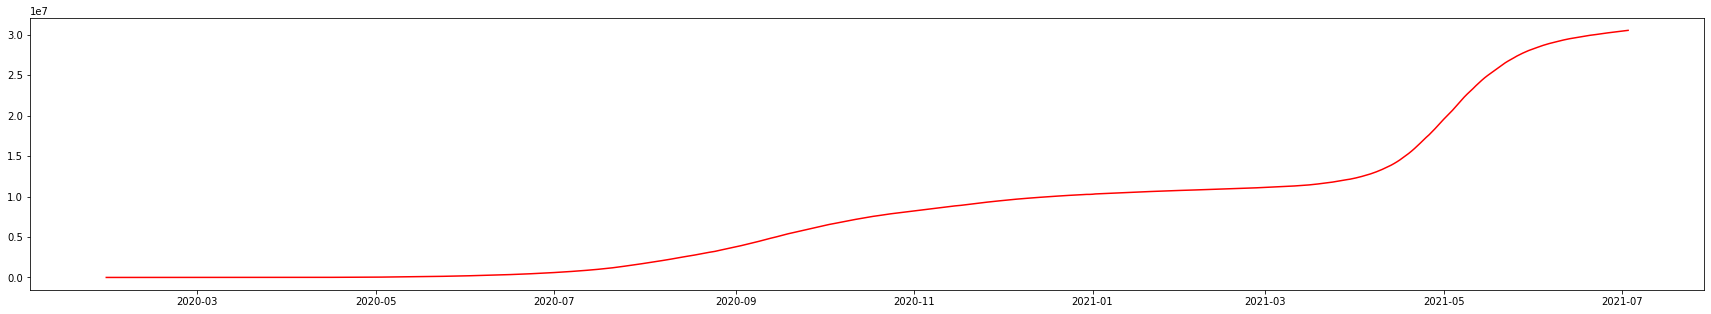

In [ ]:
#Plotting the original dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
plt.plot(df_new['ds'],df_new['y'],c='r')
plt.show()

In [ ]:
#Forecasting  the data
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=0.1)
model.fit(df_new)
x=model.make_future_dataframe(30,freq='D')
forecast = model.predict(x)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


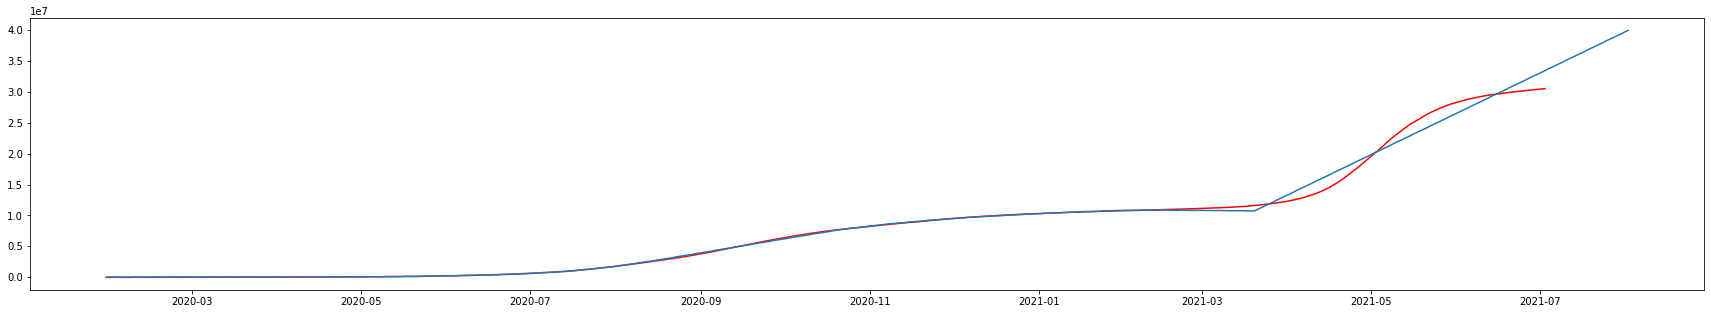

In [ ]:
#Plotting the forecasted  data
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
plt.plot(df_new['ds'],df_new['y'],c='r')
plt.plot(forecast['ds'],forecast['yhat'])
plt.show()

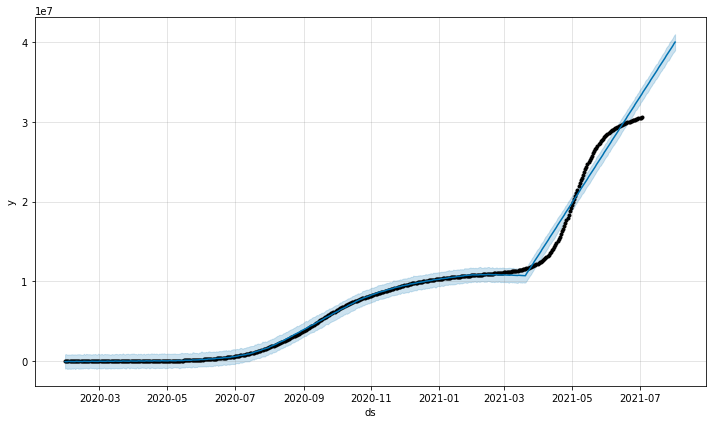

In [ ]:
model.plot(forecast);

In [ ]:
df_latest = data.loc[data['date'] == data['date'].max()].reset_index(drop=True) #-----------------------Creating dataframe with the latest date

continents = ['Africa','Asia','Europe','North America','South America','World','European Union']
for continent in continents:
  index = df_latest[ df_latest['location'] == continent ].index
  df_latest.drop(index, inplace=True) #------------------------------------------------------------Droping rows containing data for continents

#ANALYSIS FOR TOTAL NUMBER OF CASES---------------------------------------------------------------------------------------------------------------------#
dfa = df_latest[['location','total_cases']].reset_index(drop=True)
indexes = dfa[dfa['total_cases'] == 0 ].index
dfa.drop(indexes, inplace=True)
dfa = dfa.reset_index(drop=True)


maxval = dfa['total_cases'].idxmax() #------------Fetching index of maximum value from total cases
minval = dfa['total_cases'].idxmin() #------------Fetching index of minimum value from total cases

print('\n1. Country with highest number of cases : ' + (dfa.iloc[maxval,:][0]))
print('   Number of case(s) in ' + (dfa.iloc[maxval,:][0]) + ' : ' + str(dfa.iloc[maxval,:][1]))
print('\n')
print('2. Country with least number of cases : ' + (dfa.iloc[minval,:][0]))
print('   Number of case(s) in ' + (dfa.iloc[minval,:][0]) + ' : ' + str(dfa.iloc[minval,:][1]))
print('____________________________________________________________________')


#ANALYSIS FOR TOTAL NUMBER OF DEATHS-------------------------------------------------------------------------------------------------------------------#

dfd = df_latest[['location','total_deaths']].reset_index(drop=True)
indexes = dfd[dfd['total_deaths'] == 0 ].index
dfd.drop(indexes, inplace=True)
dfd = dfd.reset_index(drop=True)

maxval = dfd['total_deaths'].idxmax() #------------Fetching index of maximum value from total deaths
minval = dfd['total_deaths'].idxmin() #------------Fetching index of minimum value from total deaths

print('\n3. Country with highest number of deaths : ' + (dfd.iloc[maxval,:][0]))
print('   Number of death(s) in ' + (dfd.iloc[maxval,:][0]) + ' : ' + str(dfd.iloc[maxval,:][1]))
print('\n')
print('4. Country with least number of deaths : ' + (dfd.iloc[minval,:][0]))
print('   Number of death(s) in ' + (dfd.iloc[minval,:][0]) + ' : ' + str(dfd.iloc[minval,:][1]))
print('____________________________________________________________________')


1. Country with highest number of cases : United States
   Number of case(s) in United States : 33713870.0


2. Country with least number of cases : Micronesia (country)
   Number of case(s) in Micronesia (country) : 1.0
____________________________________________________________________

3. Country with highest number of deaths : United States
   Number of death(s) in United States : 605493.0


4. Country with least number of deaths : Bhutan
   Number of death(s) in Bhutan : 1.0
____________________________________________________________________
